In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('solar-radiation.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_relative_humidity,mean_air_temperature,mean_wind_speed,total_sunshine_duration,percentage_possible_sunshine,solar_radiation
0,Jan-10,90.0,67,16.8,5.0,92.7,28,9.1
1,Feb-10,276.5,77,18.3,5.6,69.5,22,9.2
2,Mar-10,41.5,71,19.9,5.8,134.9,36,14.2
3,Apr-10,219.0,76,21.2,5.4,81.3,21,13.4
4,May-10,574.5,79,23.8,5.1,111.8,27,14.8


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.9439032454099134


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[10.21795842 10.08166602 13.90351868 11.90591094 14.84007319 15.88427093
 16.64697673 18.70028438 18.02429527 12.34448842 10.01473695 10.48276708
  8.41526822 10.88718456 10.24975849 16.87437113 13.54699737 19.96018866
 23.00866301 19.91076139 17.4059123  13.0443413  10.04079131  9.13611304
  9.21097227  9.3606309  13.16624947 12.70521663 16.47587032 16.18042996
 22.92558236 17.4105313  15.27460485 13.89515074 10.5111584   9.4164613
  9.80846048 10.75909399 14.54147    12.58975891 14.039499   20.97587775
 23.98188819 21.86576009 17.21919201 12.23037123 10.50694958  9.4342912
 11.56408194  9.99923975 12.19274748 15.45747181 15.29291601 16.72929528
 22.62460202 18.54257039 18.74566055 14.14378175 11.44662789  8.60964978
  9.24817119 10.35141112 13.81649601 14.12746716 17.16941278 21.77368767
 20.23844768 17.68754217 17.49152871 14.46040177 11.89869828 10.29343693
  9.94847669  8.86550247 12.32547233 15.14698384 17.00267922 19.67586479
 23.53221529 20.80937348 14.5669

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.8259109989971984
Mean Squared Error: 1.037256066846007
Root Mean Squared Error: 1.0184576902581701


Text(0.5, 1.0, 'Solar radiation - actual and predicted values')

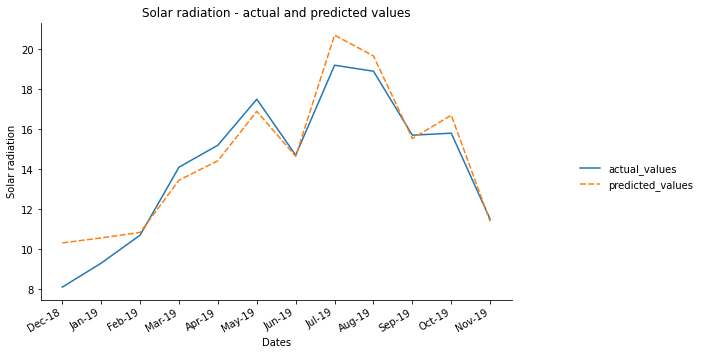

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Solar radiation') #set the label for the y-axis
plt.title('Solar radiation - actual and predicted values') #set the title of the graph